In [4]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [5]:
import io

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv")
df.head()


,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [6]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [7]:
df.columns


Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [8]:
df.dtypes

Date                        object
Year                         int64
Month                       object
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

In [10]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [11]:
df.dtypes

Date                        object
Year                         int64
Month                        int64
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

## TASK 1.1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

In [19]:
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
    # Grouping the data by 'Year' and calculating the mean of 'Estimated_fire_area'
df_line = df.groupby('Year')['Automobile_Sales'].mean()
    # Plotting the data
df_line.plot(x=df_line.index, y=df_line.values)
plt.xlabel('Year')
plt.ylabel('Automobile_Sales')
plt.title('Yearly Automobile Sales')
plt.show()

NameError: name 'df_line' is not defined

<Figure size 1000x600 with 0 Axes>

### Include the following on the plot
### ticks on x- axis with all the years, to identify the years of recession
### annotation for at least two years of recession
### Title as Automobile Sales during Recession

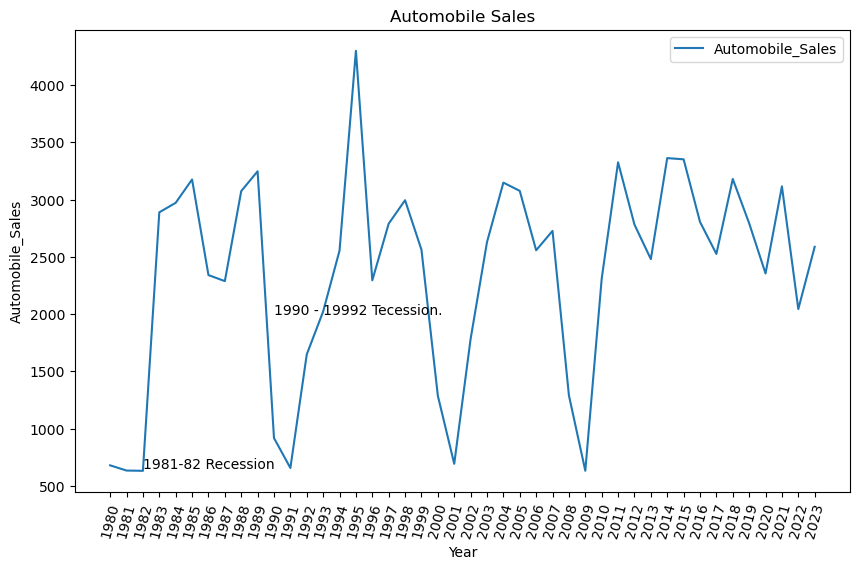

In [22]:
plt.figure(figsize=(10, 6))
df_line = df.groupby('Year')['Automobile_Sales'].mean()
df_line.plot(kind = 'line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Year')
plt.ylabel('Automobile_Sales')
plt.title('Automobile Sales')
plt.text(1982, 650, '1981-82 Recession')
plt.text(1990, 2000, '1990 - 19992 Tecession.')
plt.legend()
plt.show()

####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

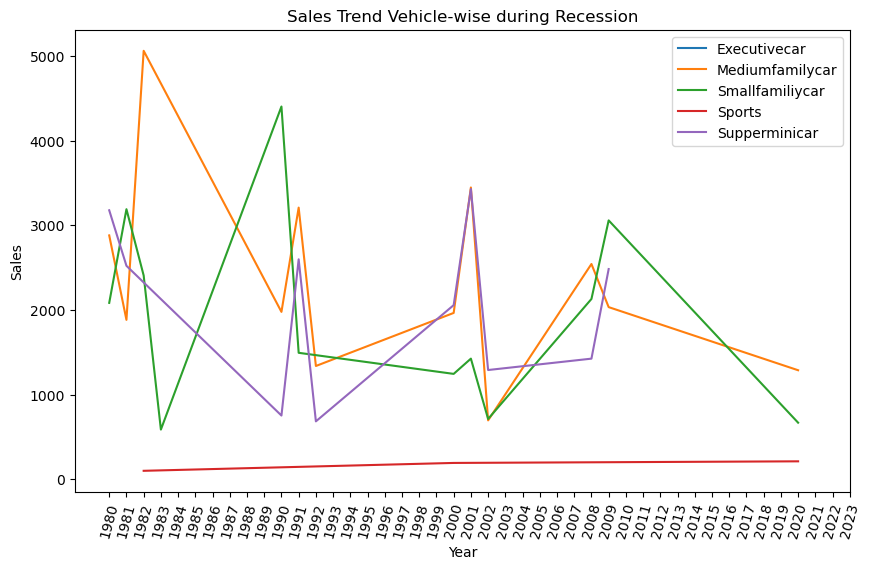

In [25]:
plt.figure(figsize=(10, 6))
df_rec = df[df['Recession']==1]
df_Mline = df_rec.groupby(['Year','Vehicle_Type'])['Automobile_Sales'].sum().reset_index()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xticks(list(range(df.Year.unique().min(), df.Year.unique().max()+1)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()



#### The plot above describes no obvious effect on the limited amount of sports cars bought during the period 1980 - 2024.  (sports cars are generally expensive to buy and run so perhaps owners of sports cars are less likely to feel the harsh impacts of a recession.) There is no record of executive vehicles being purchased in these periods and there are no recorded sales of supermini cars being made after 2010 (Perhaps missing data)



### TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

Text(0.5, 1.0, 'Average Automobile Sales during Recession and Non-Recession')

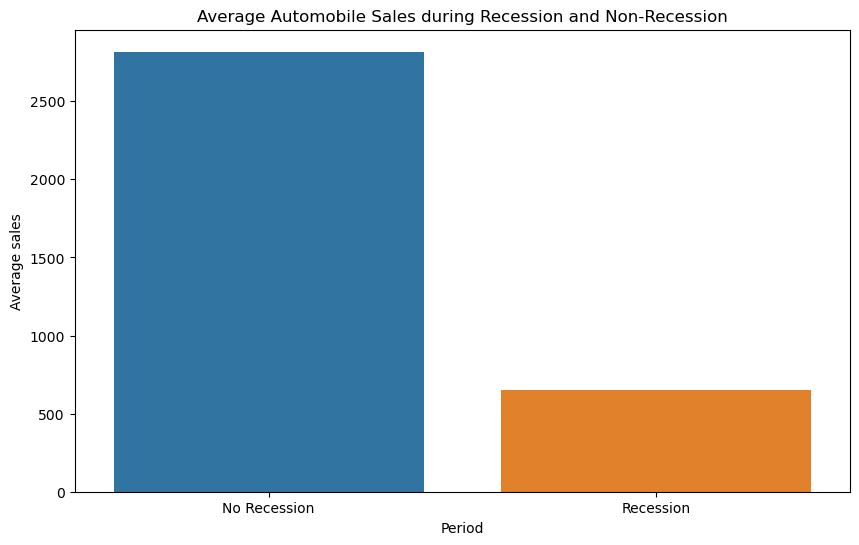

In [29]:
df1=df.groupby(["Recession"])["Automobile_Sales"].mean().reset_index()
df1["Recession"] = df1["Recession"].replace({0:"No Recession", 1:"Recession"})
#plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=df1, x="Recession", y="Automobile_Sales")
plt.xlabel('Period')
plt.ylabel('Average sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')

### Now you want to compare the sales of different vehicle types during a recession and a non-recession period

AttributeError: 'numpy.int64' object has no attribute 'startswith'

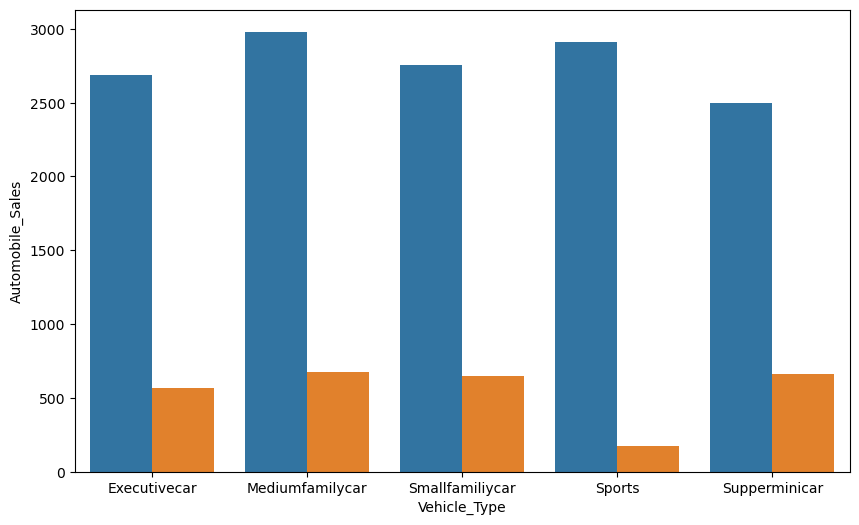

In [32]:
recession_data = df[df['Recession'] == 1]

dd=df.groupby(['Vehicle_Type','Recession'])['Automobile_Sales'].mean().reset_index()

    # Calculate the total sales volume by vehicle type during recessions
    #sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

    # Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle_Type', y='Automobile_Sales', hue='Recession', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Vehicle type')    
plt.ylabel('Av Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()




### From the above chart what insights have you gained on the overall sales of automobiles during recession?


#### Sales fall significantly in a recession, particulally the sales of executive and sports cars

#### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

Now, you want to find more insights from the data to understand the reason.
Plot a two line charts using subplotting to answer:-

How did the GDP vary over time during recession and non-recession periods?

Make use of add_subplot() from Matplotlib for this comparision.

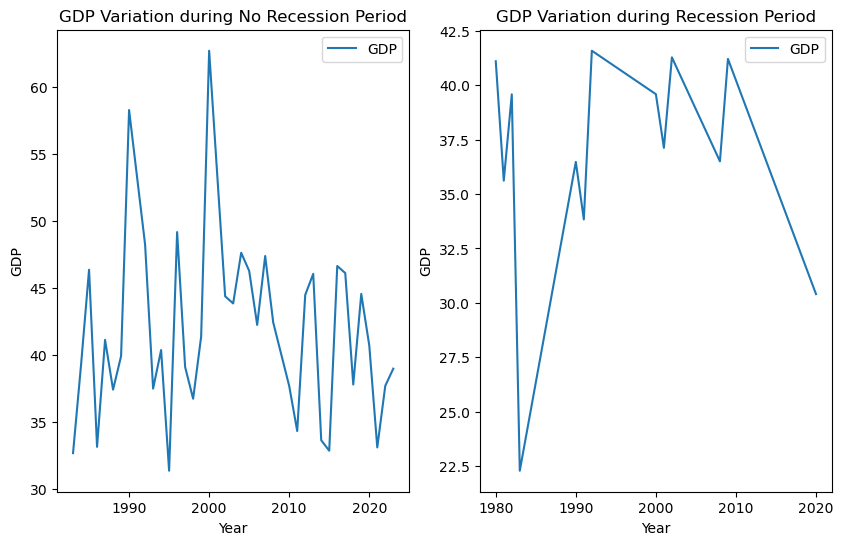

In [34]:
df2 = df.groupby(["Recession","Year"])["GDP"].mean().reset_index()
no = df2[df2["Recession"] == 0]
yes = df2[df2["Recession"] == 1]

fig = plt.figure(figsize=(10, 6))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

no.plot(x="Year", y="GDP", kind="line", ax=ax0)
ax0.set_title('GDP Variation during No Recession Period')
ax0.set_ylabel('GDP')

yes.plot(x="Year", y="GDP", kind="line", ax=ax1)
ax1.set_title('GDP Variation during Recession Period')
ax1.set_ylabel('GDP')

plt.show()


### lower GDP has a correlation with less car sales.

### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
#### How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble
Title this plot as 'Seasonality impact on Automobile Sales'

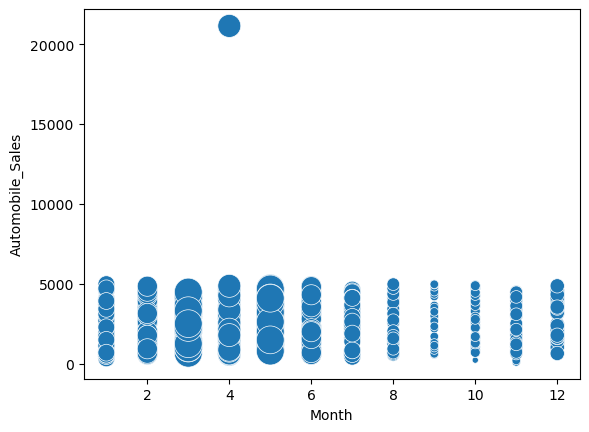

In [38]:
sns.scatterplot(data = df,  x="Month",y="Automobile_Sales",size="Seasonality_Weight",legend=False,sizes=(20, 400) )
plt.show()


#### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period?

Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'

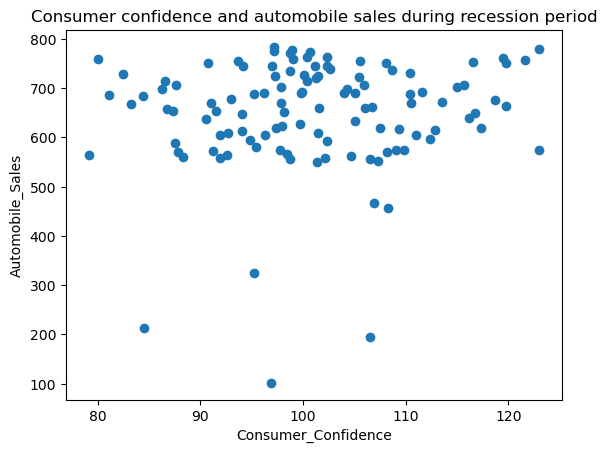

In [41]:
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
    
plt.xlabel('Consumer_Confidence')
plt.ylabel('Automobile_Sales')
plt.title('Consumer confidence and automobile sales during recession period')
plt.show()

### How does the average vehicle price relate to the sales volume during recessions?

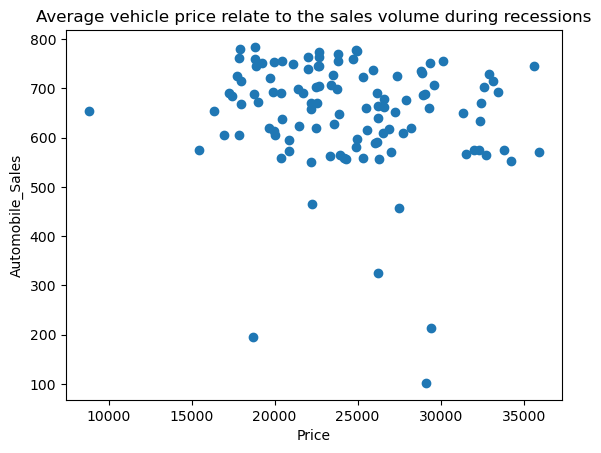

In [43]:
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
    
plt.xlabel('Price')
plt.ylabel('Automobile_Sales')
plt.title('Average vehicle price relate to the sales volume during recessions')
plt.show()

### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

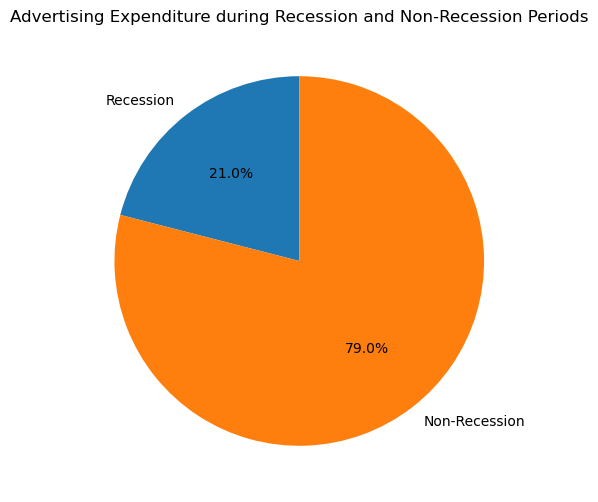

In [51]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]
# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()
# Create a pie chart for the advertising expenditure 
plt.figure(figsize=(6, 6))
labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.show()

#### There is not much relation in the 2 charts above

### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.
¶
Can we observe the share of each vehicle type in total expenditure during recessions?

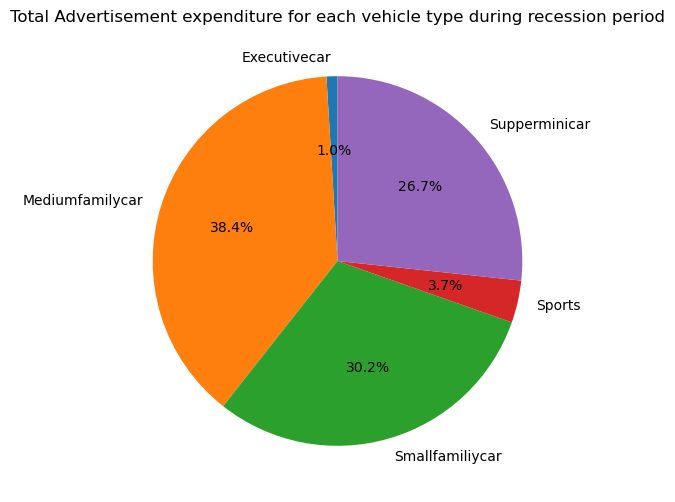

In [91]:
Rdata = df[df['Recession'] == 1]

    # Calculate the sales volume by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

    # Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(6, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Total Advertisement expenditure for each vehicle type during recession period')

plt.show()

#### During recession the advertisements were mostly focued on low price range vehicle. A wise decision!

#### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.¶

Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period

You can create a lineplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'

/var/folders/bw/_z9gq4lj48b6tvr4294sx9yw0000gp/T/ipykernel_921/1181213838.py:2: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',


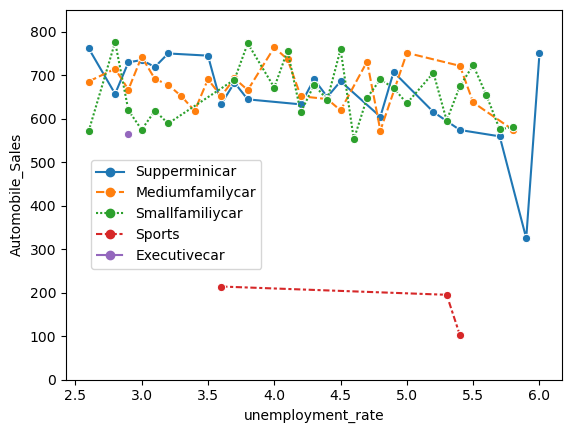

In [101]:
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))